<a href="https://colab.research.google.com/github/Coderified/NLP_Repo/blob/main/OCR_%7C_Translate_%7C_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# !nvidia-smi

In [26]:
!pip install easyocr
!pip install googletrans
!pip install gTTS

In [8]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2020-11-18 17:24:11--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 104.16.26.34, 104.16.27.34, 104.16.2.35, ...
Connecting to i.stack.imgur.com (i.stack.imgur.com)|104.16.26.34|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg’

mk1jX.jpg           100%[===================>]  44.12K  --.-KB/s    in 0s      

2020-11-18 17:24:11 (97.1 MB/s) - ‘mk1jX.jpg’ saved [45178/45178]



In [9]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [10]:
reader = easyocr.Reader(['ta'])
translator = Translator()

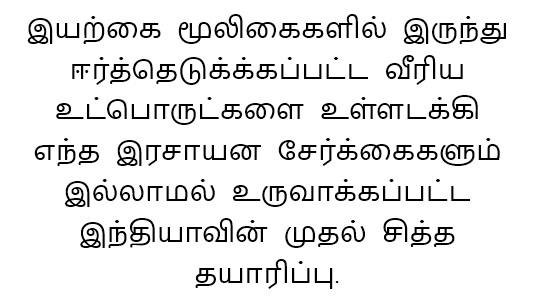

In [11]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("mk1jX.jpg")
im

In [12]:
bounds = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, decoder='beamsearch',blocklist="=-")
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.18822869658470154),
 ([[52, 36], [486, 36], [486, 106], [52, 106]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.09870069473981857),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.45306336879730225),
 ([[39, 79], [323, 79], [323, 145], [39, 145]],
  'உட்பொருட்களை ',
  0.10267538577318192),
 ([[14, 118], [522, 118], [522, 188], [14, 188]],
  'எந்த இரசாயன சேர்க்கைகளும்',
  0.11604440957307816),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.6472398042678833),
 ([[59, 195], [290, 195], [290, 272], [59, 272]],
  'இந்தியாவின் ',
  0.2412589192390442),
 ([[271.0, 200.0],
   [391.2551069659978, 203.3724465170011],
   [382.0, 272.0],
   [260.7448930340022, 268.6275534829989]],
  'மதல் <',
  0.08304061740636826),
 ([[365, 201], [475, 201], [475, 267], [365, 267]],
  'சித்த',
  0.49935948848724365),
 ([[176, 240], [358, 240], [358, 303], [176, 303]],
  'யாரிப்பு',
  0.

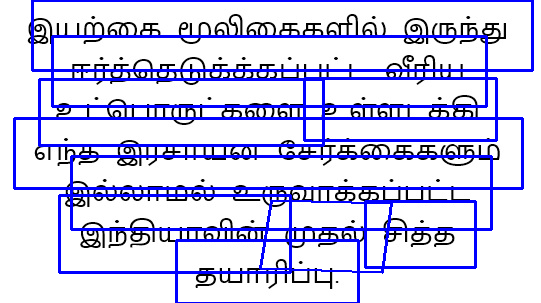

In [13]:
def draw_boxes(image,bounds,color='blue',width=3):
  draw=ImageDraw.Draw(image)
  for bound in bounds:
    p0,p1,p2,p3 = bound[0]
    draw.line([*p0,*p1,*p2,*p3,*p0], fill=color,width = width)
  return image

draw_boxes(im,bounds)

In [14]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7,link_threshold=0.8, decoder='beamsearch',blocklist="=-",detail=0)
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'எந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [15]:
text_comb=' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி எந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [16]:
print(translator.detect(text_comb))

Detected(lang=ta, confidence=1.0)


In [17]:
text_en = translator.translate(text_comb,src='ta')
print(text_en.text)

India's first paranormal product made without any chemical additives containing active ingredients extracted from natural herbs


In [18]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [19]:
Audio('trans.mp3',autoplay=True)

In [20]:
ta_tts=gTTS(text_en.text,lang='hi')
ta_tts.save('trans.mp3')

In [21]:
Audio('trans.mp3',autoplay=True)

In [23]:
text_translated = translator.translate(text_comb,'hi','ta')
print(text_translated.text)

प्राकृतिक जड़ी बूटियों से निकाले गए सक्रिय तत्वों से युक्त किसी भी रासायनिक योजक के बिना भारत का पहला असाधारण उत्पाद


In [24]:
ta_tts=gTTS(text_translated.text,lang='hi')
ta_tts.save('trans.mp3')
Audio('trans.mp3',autoplay=True)